In [1]:
import pandas as pd
import numpy as np

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [16]:
df = pd.read_csv('C:/Users/BTK/Desktop/Eric/Git/financial-models/database/RESULTADO_GGBR4_BOV_T.csv', sep=';')
df.dtypes

Periodo    object
2T2021     object
AH %       object
AV %       object
1T2021     object
            ...  
2T2010     object
AH %.44    object
AV %.44    object
1T2010     object
AV %.45    object
Length: 138, dtype: object

In [19]:
df.fillna(0, inplace=True)

for col in df.columns:
    for row in range(len(df[col])):
        if ',' in str(df[col][row]):
            df[col][row] = df[col][row].replace(',', '.')

ValueError: Unable to parse string "19130.12 M" at position 0

In [20]:
for col in df.columns:
    for row in range(len(df[col])):
        if col != 'Periodo':
            if df[col][row] == '-':
                df[col][row] = 0

            if '%' in str(df[col][row]) or 'M' in str(df[col][row]) and str(df[col][row]) == '':
                df[col][row] = 0 

            if '%' in str(df[col][row]):
                string = df[col][row]
                string = string[:-2]
                df[col][row] = np.double(string)/100

            if 'M' in str(df[col][row]):
                string = df[col][row]
                string = string[:-2]
                df[col][row] = np.double(string)*1000000

    if col != 'Periodo':
        df[col] = pd.to_numeric(df[col])

<ipython-input-20-cbe79a8a7fc1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][row] = 0
<ipython-input-20-cbe79a8a7fc1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][row] = 0
<ipython-input-20-cbe79a8a7fc1>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][row] = np.double(string)*1000000


ValueError: Unable to parse string "51.00 K" at position 12

In [14]:
df

,Periodo,2T2021,AH %,AV %,1T2021,AH %.1,AV %.1,4T2020,AH %.2,AV %.2,...,AH %.42,AV %.42,3T2010,AH %.43,AV %.43,2T2010,AH %.44,AV %.44,1T2010,AV %.45
0,Receita Líquida - (R$),19130120000.000000,0.170,1.000,16342980000.000000,0.199,1.000,13620180000.000000,0.114,1.000,...,0,0,8190030000.000000,0,0,8295750000.000000,0,0,7107590000.000000,0
1,Custos - (R$),-13715930000.000000,0.093,-0.710,-12546080000.000000,0.144,-0.767,-10959980000.000000,0.041,-0.804,...,0,0,-6840350000.000000,0,0,-6481760000.000000,0,0,-5700280000.000000,0
2,Lucro Bruto - (R$),5414190000.000000,0.425,0.280,3796910000.000000,0.427,0.232,2660200000.000000,0.567,0.195,...,0,0,1349680000.000000,0,0,1813990000.000000,0,0,1407310000.000000,0
3,Despesas/Receitas Operacionais - (R$),148510000.000000,1.621,0.007,-239020000.000000,-1.522,-0.014,-94750000.000000,0.701,-0.000,...,0,0,-569000000.000000,0,0,-566300000.000000,0,0,-465830000.000000,0
4,EBITDA - (R$),5956210000.000000,0.467,0.311,4057760000.000000,0.278,0.248,3174610000.000000,0.623,0.233,...,0,0,1265350000.000000,0,0,1719770000.000000,0,0,1401230000.000000,0
5,Amortização/Depreciação,-630500000.000000,-0.028,-0.030,-648830000.000000,-0.051,-0.039,-683840000.000000,0.056,-0.050,...,0,0,-484660000.000000,0,0,-472090000.000000,0,0,-459750000.000000,0
6,EBIT - (R$),5562690000.000000,0.563,0.290,3557890000.000000,0.386,0.217,2565450000.000000,0.859,0.188,...,0,0,780690000.000000,0,0,1247690000.000000,0,0,941480000.000000,0
7,Resultado não operacional - (R$),0,0.000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Resultado Financeiro - (R$),57880000.000000,1.213,0.000,-270720000.000000,0.675,-0.016,-834180000.000000,-1.750,-0.061,...,0,0,390000.000000,0,0,-255220000.000000,0,0,-246800000.000000,0
9,Impostos - (R$),-1686100000.000000,1.064,-0.088,-816640000.000000,0.210,-0.050,-674480000.000000,1.393,-0.049,...,0,0,-172070000.000000,0,0,-136490000.000000,0,0,-121940000.000000,0


In [112]:
target = ['<CLOSE>', '<DATE>_<TIME>']
features = ['<OPEN>', '<HIGH>', '<LOW>', '<VOL>']

y = pd.DataFrame(df[target[0]])
y[target[0]] = y[target[0]].shift(-1).fillna(df[target[0]].mean())
X = df[features]

scaler = MinMaxScaler()
scaler.fit(X)
X_tr = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_tr, y, random_state=123, test_size=0.33, shuffle=True)

dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)

importances = dtree.feature_importances_

([<matplotlib.axis.XTick at 0x1daefb49880>,
 [Text(0, 0, '<LOW>'),
  Text(1, 0, '<HIGH>'),
  Text(2, 0, '<OPEN>'),
  Text(3, 0, '<VOL>')])

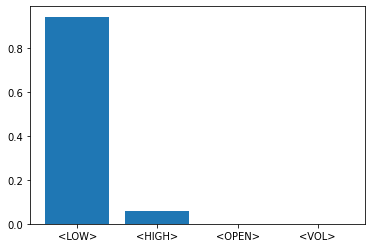

In [113]:
import matplotlib.pyplot as plt

indices = np.argsort(importances)[::-1]
feature_names = df.drop(target, axis=1).columns
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), feature_names[indices])

In [127]:
def base_line_model(X):
    y = np.random.randint(X.min(), X.max(), X.shape[0]) + np.random.random_sample(X.shape[0])
    return pd.DataFrame(y.reshape(-1, 1)).rename(columns={0: '<CLOSE>'})

In [128]:
y = base_line_model(y_test)
print(y)

         <CLOSE>
0      22.458469
1      66.158474
2      75.798074
3       9.891546
4      65.057120
...          ...
64275  30.266466
64276  57.260873
64277  69.079384
64278  57.167335
64279  33.253910

[64280 rows x 1 columns]


In [129]:
pred = dtree.predict(X_test)

print(f'Base Line Model\n>> MSE {mean_squared_error(pred, y)}\n>> MAE {mean_absolute_error(pred, y)}')
print(y)
print(f'X_test Model\n>> MSE {mean_squared_error(pred, y_test)}\n>> MAE {mean_absolute_error(pred, y_test)}')
print(y_test)

Base Line Model
>> MSE 991.5409393221339
>> MAE 25.710069809690165
         <CLOSE>
0      22.458469
1      66.158474
2      75.798074
3       9.891546
4      65.057120
...          ...
64275  30.266466
64276  57.260873
64277  69.079384
64278  57.167335
64279  33.253910

[64280 rows x 1 columns]
X_test Model
>> MSE 0.05060233009269045
>> MAE 0.056730507696347604
          <CLOSE>
108191  23.111486
105027  20.085497
73596    9.440068
143230  31.256326
62681    9.037602
...           ...
26122   16.820516
27993   17.274587
46415   18.111700
35715   14.981031
76054    8.642316

[64280 rows x 1 columns]
